<a href="https://colab.research.google.com/github/Anbu-developer/Data_Analysis_with_python/blob/main/Exploratory_Data_Analysis_(EDA)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **csv file: HR are bit worried about the high attrition rate,thus being a data analyst it your task to get the resons of attrition rate and also give suggession to to be implemented so that overcome the attrition**

**To analyze the reasons for high attrition and provide actionable suggestions, we can perform Exploratory Data Analysis (EDA) on the dataset you provided. Here's how we approach the problem step-by-step**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [29]:
#step 1
data= pd.read_csv('People.csv')
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


____________________________________  Attrition Counts ____________________________________ 
left
0    11428
1     3571
Name: count, dtype: int64


<ipython-input-32-6e6c816a9d21>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='coolwarm')


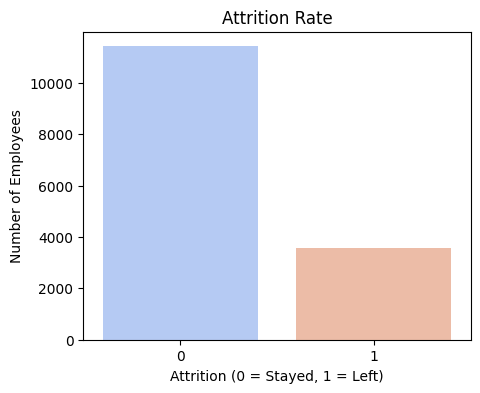

In [32]:
# Step 2: Attrition Rate Analysis
# Check for attrition column (assuming 'left' indicates attrition)
print("____________________________________  Attrition Counts ____________________________________ ")
if 'left' in data.columns:
    attrition_counts = data['left'].value_counts()
    print(attrition_counts)

    # Plot attrition rates
    plt.figure(figsize=(5, 4))
    sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='coolwarm')
    plt.title("Attrition Rate")
    plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
    plt.ylabel("Number of Employees")
    plt.show()

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [46]:
print(data[['satisfactoryLevel', 'left']].isnull().sum())

satisfactoryLevel    0
left                 0
dtype: int64


<ipython-input-47-f5ce11ddbd4e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='satisfactoryLevel', data=data, palette='Set2')


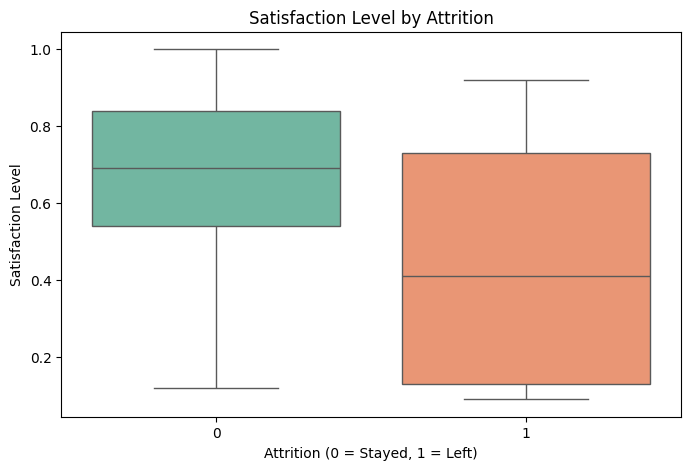

In [47]:
!pip install seaborn --upgrade
!pip install matplotlib --upgrade


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Step 3: Satisfaction Level vs. Attrition
if 'satisfactoryLevel' in data.columns and 'left' in data.columns:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x='left', y='satisfactoryLevel', data=data, palette='Set2')
  plt.title("Satisfaction Level by Attrition")
  plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
  plt.ylabel("Satisfaction Level")
  plt.show()


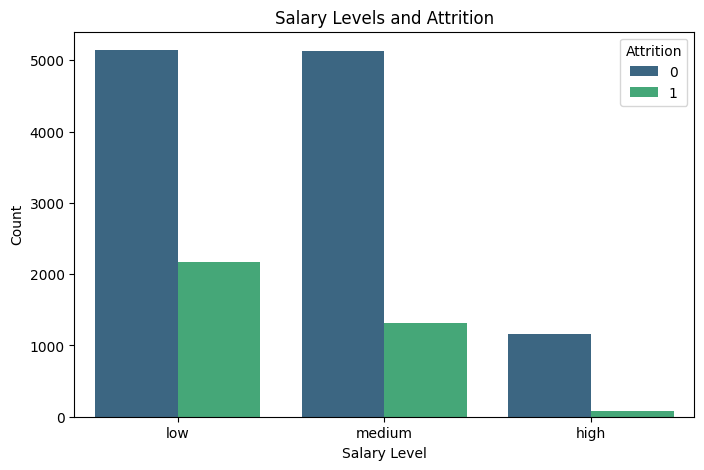

In [48]:
# Step 4: Salary Distribution and Attrition
if 'salary' in data.columns and 'left' in data.columns:

  plt.figure(figsize=(8, 5))
  sns.countplot(x='salary', hue='left', data=data, palette='viridis', order=data['salary'].value_counts().index)
  plt.title("Salary Levels and Attrition")
  plt.xlabel("Salary Level")
  plt.ylabel("Count")
  plt.legend(title='Attrition', loc='upper right')
  plt.show()

In [49]:
data.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

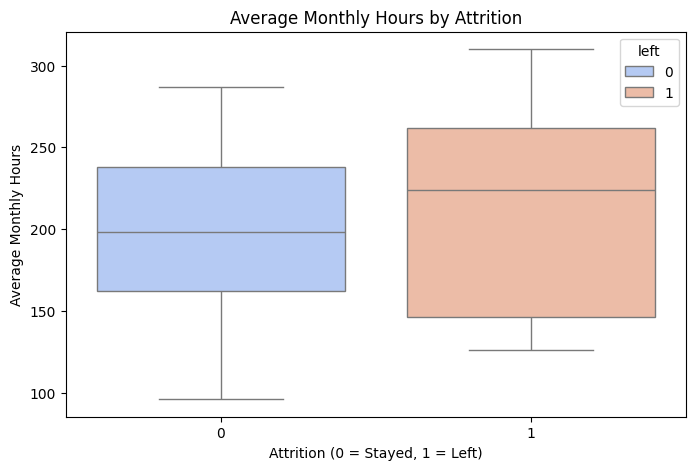

In [52]:
# Step 5: Average Monthly Hours vs. Attrition
if 'avgMonthlyHours' in data.columns and 'left' in data.columns:
  plt.figure(figsize=(8, 5))
  sns.boxplot(x='left', y='avgMonthlyHours',hue='left', data=data, palette='coolwarm')
  plt.title("Average Monthly Hours by Attrition")
  plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
  plt.ylabel("Average Monthly Hours")
  plt.show()

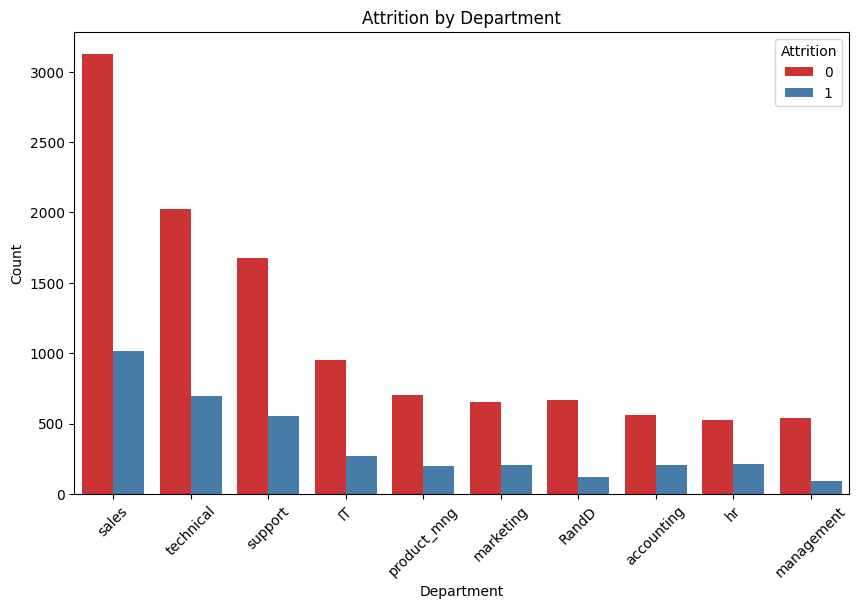

In [53]:
# Step 6: Department Analysis
if 'dept' in data.columns and 'left' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='dept', hue='left', data=data, palette='Set1', order=data['dept'].value_counts().index)
    plt.title("Attrition by Department")
    plt.xlabel("Department")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Attrition', loc='upper right')
    plt.show()

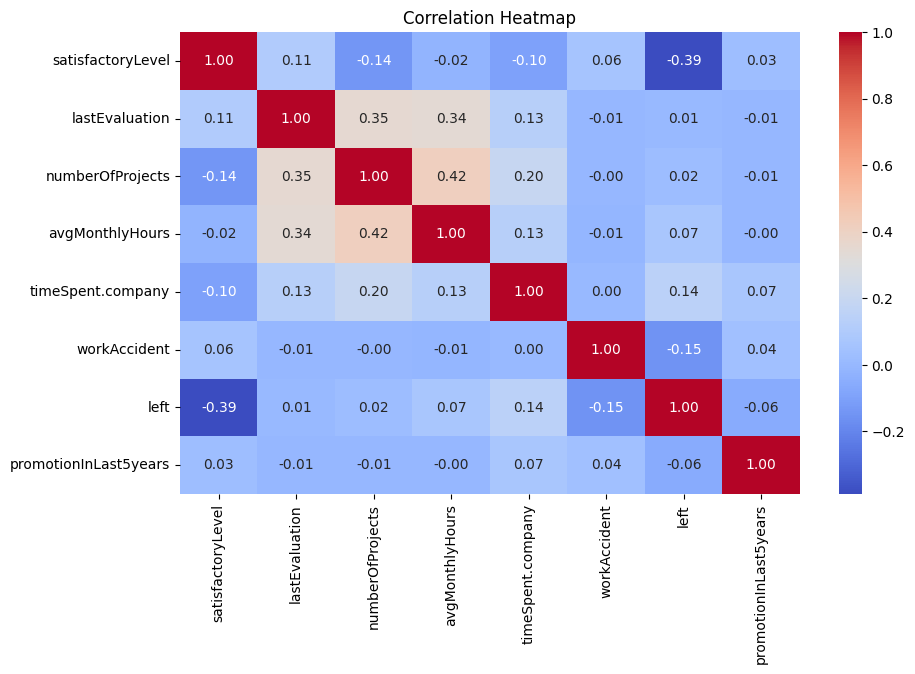

In [56]:
# Step 7: Correlation Matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [57]:
data.columns


Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [59]:
# Step 8: Key Insights and Suggestions
print()
print("\n***************************************************************************Key Insights***************************************************************************")
if 'satisfactoryLevel' in data.columns:
    avg_satisfaction_left = data[data['left'] == 1]['satisfactoryLevel'].mean()
    avg_satisfaction_stayed = data[data['left'] == 0]['satisfactoryLevel'].mean()
    print(f"Average satisfaction level of employees who left: {avg_satisfaction_left:.2f}")
    print(f"Average satisfaction level of employees who stayed: {avg_satisfaction_stayed:.2f}")

if 'avgMonthlyHours' in data.columns:
    avg_hours_left = data[data['left'] == 1]['avgMonthlyHours'].mean()
    avg_hours_stayed = data[data['left'] == 0]['avgMonthlyHours'].mean()
    print(f"Average monthly hours of employees who left: {avg_hours_left:.2f}")
    print(f"Average monthly hours of employees who stayed: {avg_hours_stayed:.2f}")

print("\nSuggestions:")
print("- Improve satisfaction levels by conducting regular surveys and addressing grievances.")
print("- Implement workload management to ensure employees are not overworked.")
print("- Offer competitive salaries, especially in departments with high attrition.")
print("- Provide clear career advancement opportunities to employees.")



***************************************************************************Key Insights***************************************************************************
Average satisfaction level of employees who left: 0.44
Average satisfaction level of employees who stayed: 0.67
Average monthly hours of employees who left: 207.42
Average monthly hours of employees who stayed: 199.06

Suggestions:
- Improve satisfaction levels by conducting regular surveys and addressing grievances.
- Implement workload management to ensure employees are not overworked.
- Offer competitive salaries, especially in departments with high attrition.
- Provide clear career advancement opportunities to employees.
